In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('fresh_data.csv').drop(columns=['Unnamed: 3'])


In [3]:
df = df[df['rate'] != 3]


In [4]:
# Function to convert score to sentiment
def to_sentiment(rating):
    
    rating = int(rating)
    
    # Convert to class
    if rating <= 2:
        return 0
    else:
        return 1

# Apply to the dataset 
df['sentiment'] = df.rate.apply(to_sentiment)

Text(0.5, 0, 'review sentiment')

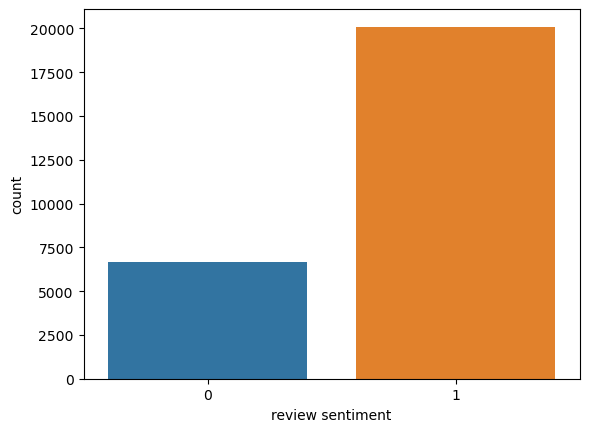

In [5]:
# # Plot the distribution
class_names = ['negative', 'positive']
'''
- Tạo 2 class: Negative n Positive
'''
sns.countplot( x='sentiment',data = df)
plt.xlabel('review sentiment')

In [6]:
from sklearn.utils import resample

df_majority = df[(df['sentiment'] == 1)]
df_minority = df[(df['sentiment'] == 0)]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples=20093, # to match majority class
                                 random_state=42)

df1 = pd.concat([df_minority_upsampled, df_majority])

In [7]:
X = df1['comment']
y = df1['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
bow_vectorizer = CountVectorizer(max_features=10000)


# transform
bow_X_train = bow_vectorizer.fit_transform(X_train)
bow_X_test = bow_vectorizer.transform(X_test)

In [9]:
vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [10]:
model1 = SVC()
model1.fit(X_train_tfidf, y_train)

SVC()

In [34]:
import joblib

# Save the model to a file
joblib.dump(model1, 'svc_model.pkl')


['svc_model.pkl']

In [11]:
model2 = SVC()
model2.fit(bow_X_train, y_train)

SVC()

In [12]:
y_pred1 = model1.predict(X_test_tfidf)
y_pred2 = model2.predict(bow_X_test)



In [17]:
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", round(accuracy,2) )
print("Classification Report:")
print(classification_report(y_test, y_pred1))

Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      4036
           1       0.97      0.93      0.95      4002

    accuracy                           0.95      8038
   macro avg       0.95      0.95      0.95      8038
weighted avg       0.95      0.95      0.95      8038



In [18]:
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", round(accuracy,2) )
print("Classification Report:")
print(classification_report(y_test, y_pred2))

Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      4036
           1       0.95      0.91      0.93      4002

    accuracy                           0.93      8038
   macro avg       0.93      0.93      0.93      8038
weighted avg       0.93      0.93      0.93      8038



In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix

def plot_cm(y_true, y_pred):
    plt.figure(figsize=(6,6))
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    
    sns.heatmap(
        cm, annot=True, cmap='Blues', cbar=False, fmt='.2f',
        xticklabels='1', yticklabels='0')
    
    return plt.show()

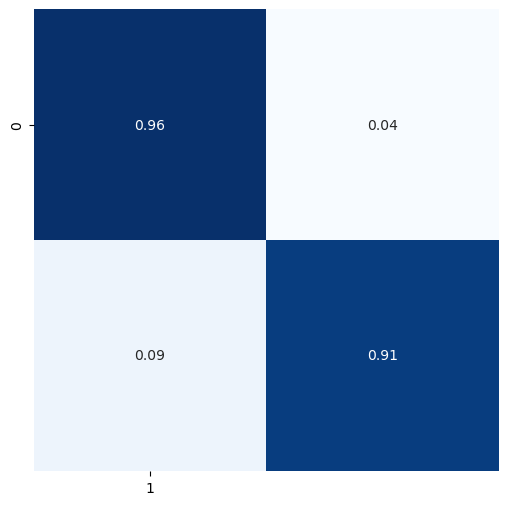

In [33]:
plot_cm(y_test, y_pred2)


In [19]:
def predict_sentiment(review):
    review_tfidf = vectorizer.transform([review])
    sentiment = model1.predict(review_tfidf)
    return sentiment[0] 

In [22]:
new_review = "Hàng hoá lừa đảo"
predicted_sentiment = predict_sentiment(new_review)
print("Predicted sentiment:", predicted_sentiment)

Predicted sentiment: 0
